In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [19]:
data_reg = pd.read_csv('../data/lab3.csv')
data_class = pd.read_csv('../data/lab4.csv')

# 1. Задание 1.

## 1.1. DecisionTreeRegressor.

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

In [21]:
y = data_reg["Diabetes_012"]
X = data_reg.drop(["Diabetes_012"], axis=1)

In [22]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=3)

In [24]:
from sklearn import tree

text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_13 <= 2.50
|   |   |--- feature_18 <= 9.50
|   |   |   |--- value: [0.05]
|   |   |--- feature_18 >  9.50
|   |   |   |--- value: [0.15]
|   |--- feature_13 >  2.50
|   |   |--- feature_18 <= 8.50
|   |   |   |--- value: [0.18]
|   |   |--- feature_18 >  8.50
|   |   |   |--- value: [0.36]
|--- feature_0 >  0.50
|   |--- feature_13 <= 2.50
|   |   |--- feature_3 <= 31.50
|   |   |   |--- value: [0.23]
|   |   |--- feature_3 >  31.50
|   |   |   |--- value: [0.45]
|   |--- feature_13 >  2.50
|   |   |--- feature_3 <= 31.50
|   |   |   |--- value: [0.51]
|   |   |--- feature_3 >  31.50
|   |   |   |--- value: [0.80]



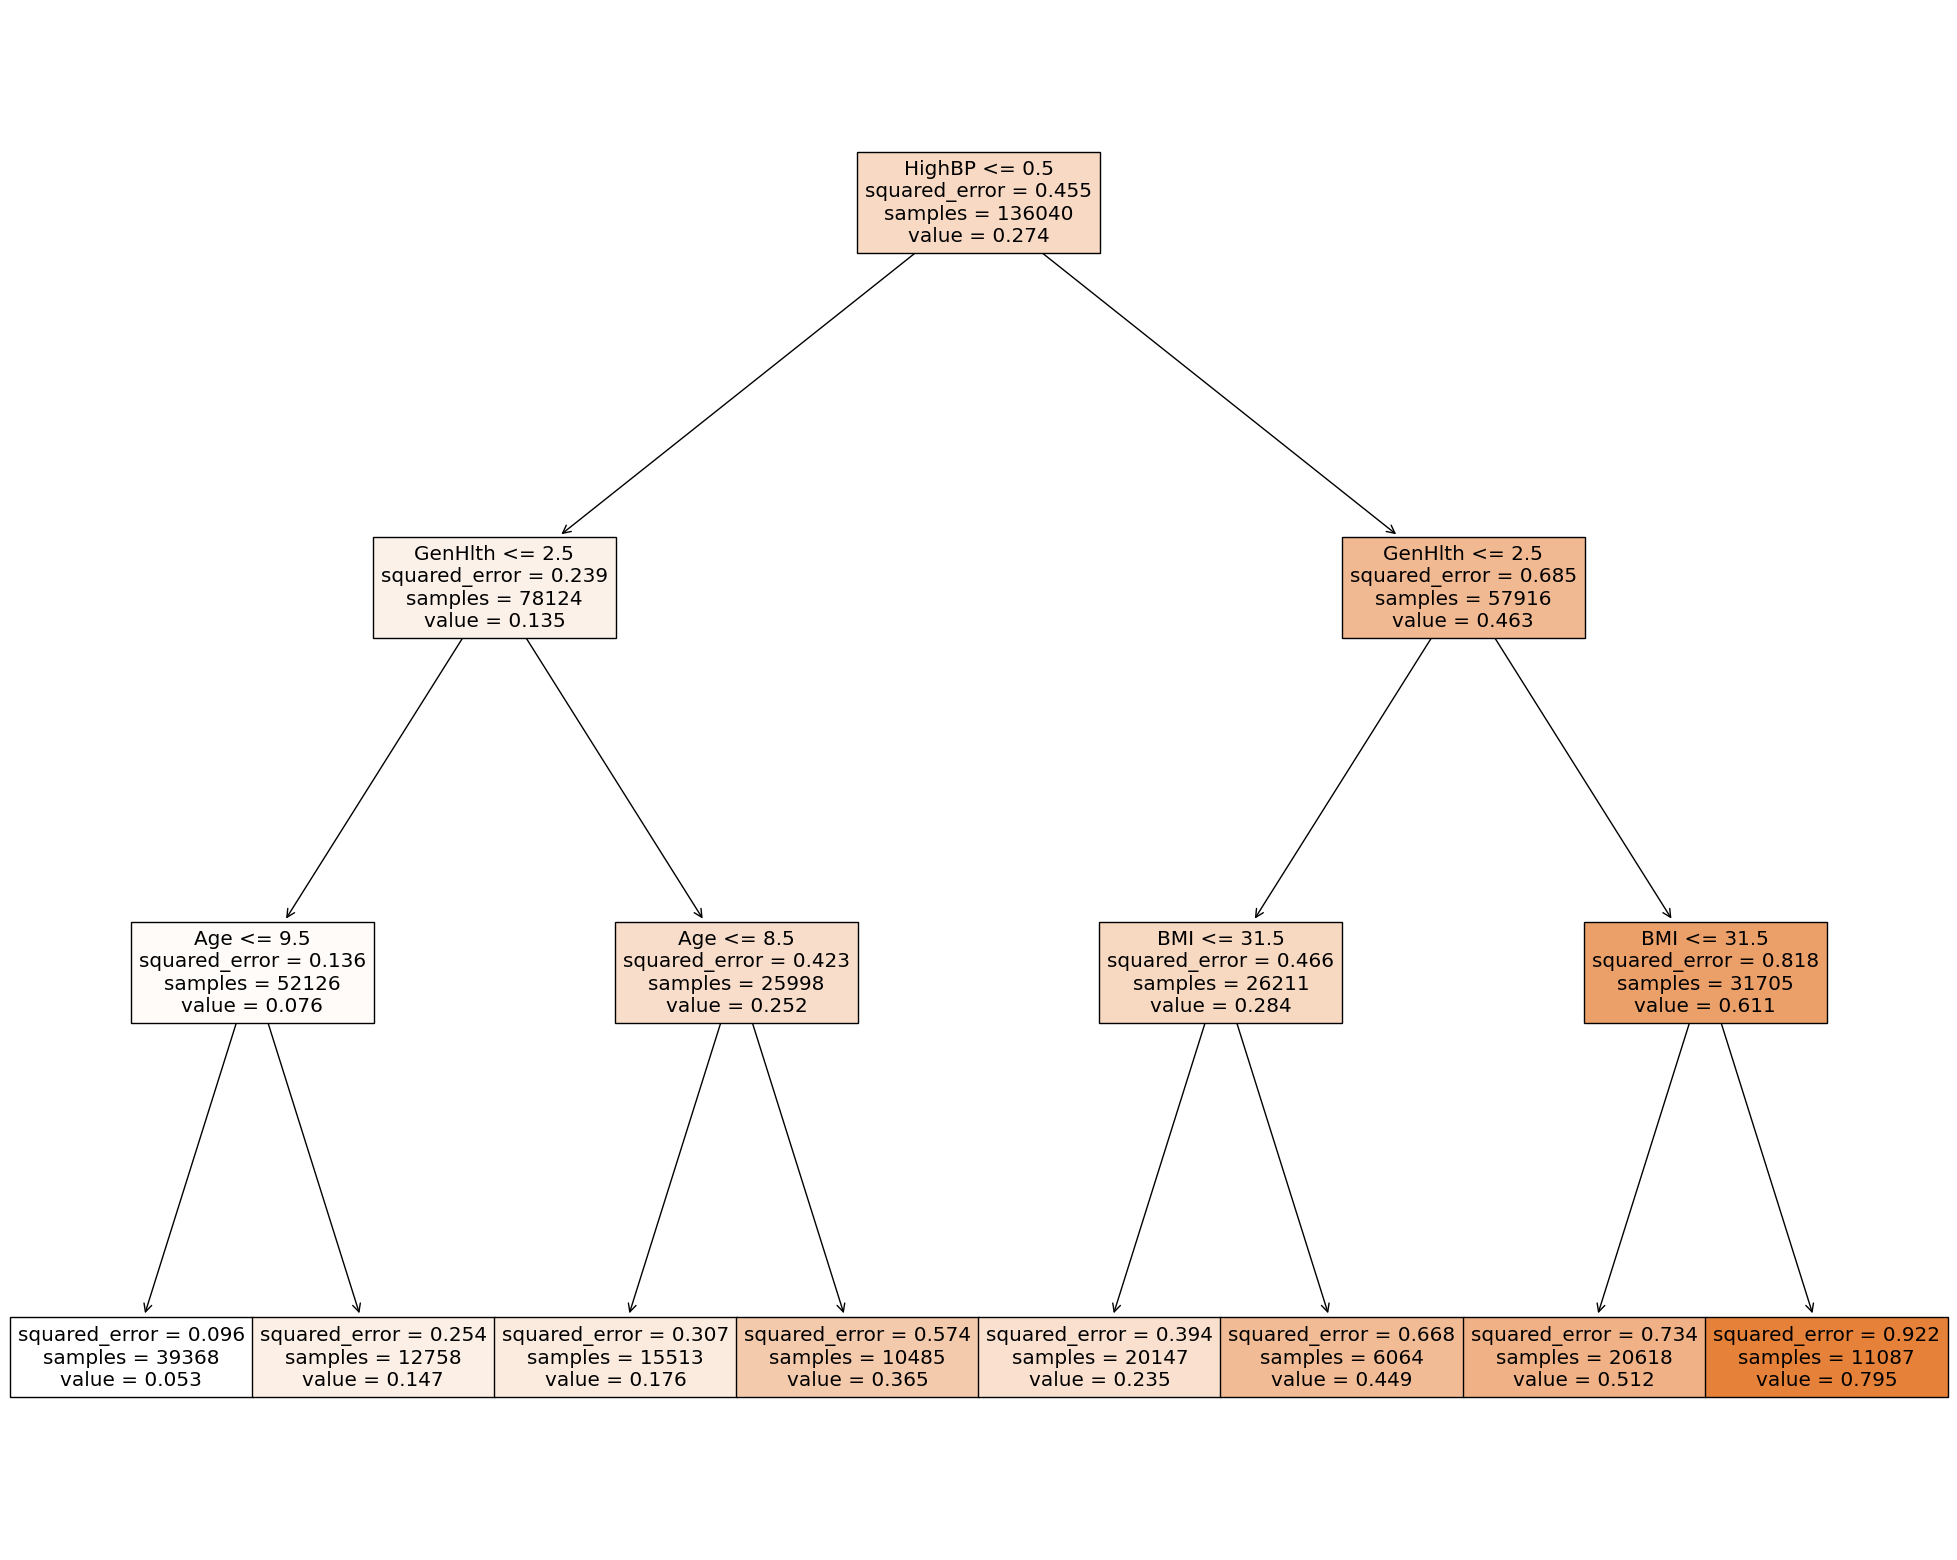

In [25]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=X_test_reg.columns.to_list(), filled=True)

In [26]:
y_hat_reg = reg.predict(X_test_reg)

In [27]:
predictions = pd.DataFrame({ 'y_test':y_test_reg,'y_hat':y_hat_reg})
predictions.head()

,y_test,y_hat
28716,0,0.364807
40267,2,0.795256
118475,0,0.234626
164509,0,0.795256
25817,0,0.511786


/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

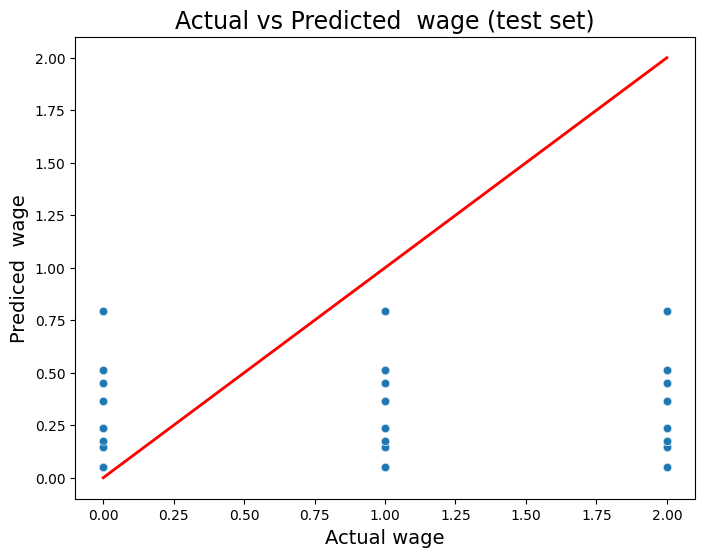

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_reg, y=y_hat_reg, alpha=0.6)
sns.lineplot(x=y_test_reg, y=y_test_reg, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [30]:
MSE_test = round(np.mean(np.square(y_test_reg - y_hat_reg)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.64

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [33]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_hat_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_hat_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_hat_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_hat_reg))}')
print(f'R^2: {reg.score(X_test_reg, y_test_reg)}')

MAE: 0.41565413333739876
MSE: 0.40570466469479255
RMSE: 0.6369494993284731
MAPE: 30537578.14152348
R^2: 0.10914437924095621


## 1.2 DecisionTreeClassifier.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [35]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [36]:
y = data_class['RainTomorrow']
X = data_class.drop(['RainTomorrow'],axis = 1)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2,random_state=0)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_class, y_train_class)

DecisionTreeClassifier(max_depth=3)

In [37]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_13 <= 71.50
|   |--- feature_13 <= 51.27
|   |   |--- feature_5 <= 7.55
|   |   |   |--- class: 0
|   |   |--- feature_5 >  7.55
|   |   |   |--- class: 0
|   |--- feature_13 >  51.27
|   |   |--- feature_7 <= 49.00
|   |   |   |--- class: 0
|   |   |--- feature_7 >  49.00
|   |   |   |--- class: 0
|--- feature_13 >  71.50
|   |--- feature_13 <= 81.50
|   |   |--- feature_7 <= 47.00
|   |   |   |--- class: 0
|   |   |--- feature_7 >  47.00
|   |   |   |--- class: 1
|   |--- feature_13 >  81.50
|   |   |--- feature_3 <= 2.38
|   |   |   |--- class: 1
|   |   |--- feature_3 >  2.38
|   |   |   |--- class: 1



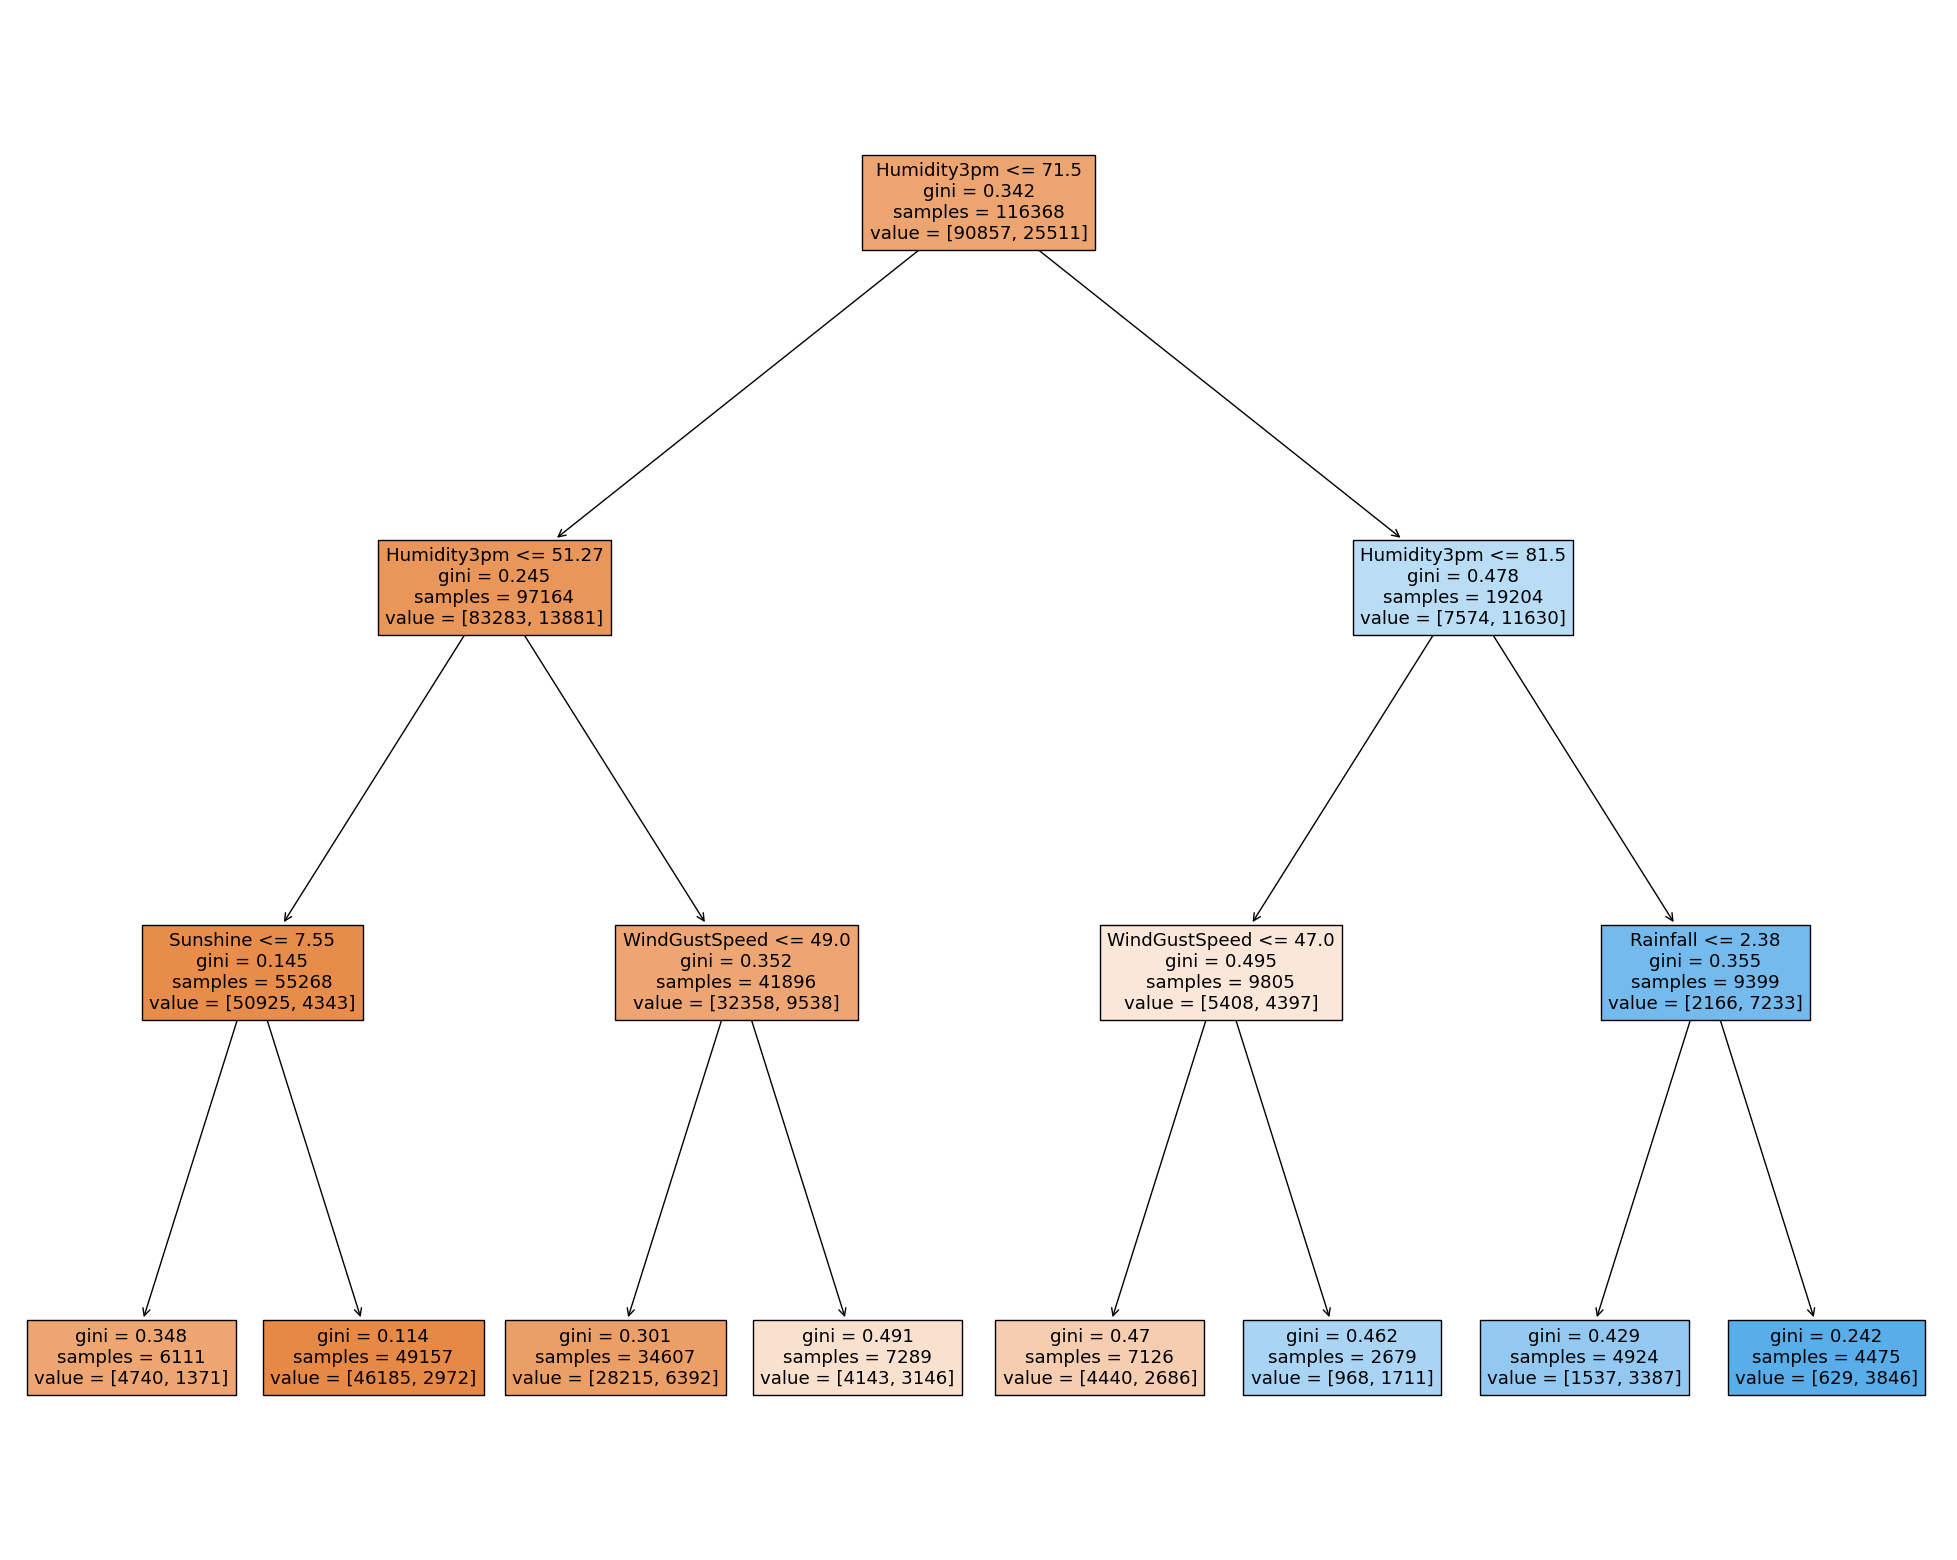

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=X.columns.to_list(), filled=True)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
y_pred_class = clf.predict(X_test_class)

In [41]:
accuracy_score(y_test_class, y_pred_class)

0.8298501306201017

In [42]:
print(clf.score(X_train_class, y_train_class))
print(clf.score(X_test_class, y_test_class))

0.8307008799670013
0.8298501306201017


In [44]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     22726
           1       0.74      0.35      0.47      6366

    accuracy                           0.83     29092
   macro avg       0.79      0.66      0.69     29092
weighted avg       0.82      0.83      0.81     29092



In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
accuracy = cross_val_score(estimator = clf, X = X_train_class, y = y_train_class, cv = 5, scoring="accuracy")
round(accuracy.mean(), 3)

0.83

# 2. Задание 2. Ансамбли.

## 2.1. Bagging.

In [119]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor

In [51]:
base_class = DecisionTreeClassifier()
base_reg = DecisionTreeRegressor()

In [54]:
bagging_regressor = BaggingRegressor(base_reg, n_estimators = 10)
bagging_classifier = BaggingClassifier(base_class, n_estimators = 10)

In [58]:
bagging_classifier.fit(X_train_class, y_train_class)
bagging_regressor.fit(X_train_reg, y_train_reg)

BaggingRegressor(estimator=DecisionTreeRegressor())

In [59]:
y_pred_bc = bagging_classifier.predict(X_test_class)
y_pred_br = bagging_regressor.predict(X_test_reg)

In [60]:
print(f'R^2: {bagging_classifier.score(X_test_class, y_pred_bc)}')

R^2: 1.0


In [43]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test_class, y_pred_bc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.72      0.47      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [64]:
print(f'R^2: {bagging_regressor.score(X_test_reg, y_pred_br)}')

R^2: 1.0


## 2.2. GradientBoosting.

In [73]:
gradient_classifier = GradientBoostingClassifier(learning_rate=0.1)
gradient_regressor = GradientBoostingRegressor(learning_rate=0.1)

In [74]:
gradient_classifier.fit(X_train_class, y_train_class)
gradient_regressor.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor()

In [75]:
y_pred_gc = gradient_classifier.predict(X_test_class)
y_pred_gr = gradient_regressor.predict(X_test_reg)

In [76]:
print(classification_report(y_test_class, y_pred_gc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.74      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



In [77]:
print(f'R^2: {gradient_regressor.score(X_test_reg, y_pred_gr)}')

R^2: 1.0


## 2.3. Stacking.

In [50]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.ensemble import StackingClassifier, StackingRegressor


In [48]:
base_models_reg = [
    ('LinearRegression', LinearRegression()),
    ('Pipeline', Pipeline([('scaler', StandardScaler()), ('poli', PolynomialFeatures(degree=3)), ('ridge', Ridge())]))
]

base_models_class = [
    ('gnb', GaussianNB()),
    ('LogisticRegression', LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=200, class_weight='balanced'))
]

In [52]:
stacking_classifier = StackingClassifier(estimators=base_models_class, final_estimator=DecisionTreeClassifier())
stacking_regressor = StackingRegressor(estimators=base_models_reg, final_estimator=DecisionTreeRegressor())

In [53]:
stacking_classifier.fit(X_train_class, y_train_class)
stacking_regressor.fit(X_train_reg, y_train_reg)

/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergejkotov/Desktop/ml/venv/lib/p

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('Pipeline',
                               Pipeline(steps=[('scaler', StandardScaler()),
                                               ('poli',
                                                PolynomialFeatures(degree=3)),
                                               ('ridge', Ridge())]))],
                  final_estimator=DecisionTreeRegressor())

In [54]:
y_pred_stacking_classifier = stacking_classifier.predict(X_test_class)
y_pred_stacking_regressor = stacking_regressor.predict(X_test_reg)

In [55]:
print(f'R^2: {stacking_regressor.score(X_test_reg, y_pred_stacking_regressor)}')

R^2: 1.0


In [56]:
print(classification_report(y_test_class, y_pred_stacking_classifier))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22726
           1       0.48      0.48      0.48      6366

    accuracy                           0.77     29092
   macro avg       0.67      0.67      0.67     29092
weighted avg       0.77      0.77      0.77     29092



# Задание 3. Catboost, XGBoost, LightBGM.

In [57]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

     |████████████████████████████████| 25.8 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 3.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/sergejkotov/Desktop/ml/venv/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.9 MB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/sergejkotov/Desktop/ml/venv/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.7 MB 1.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Command errored out with exit status 1:
   command: /Users/sergejkotov/Desktop/ml/venv/bin/python3 /Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /var/folders

In [61]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 429.1 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for lightgbm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      2023-12-12 00:15:58,375 - scikit_build_core - INFO - CMake version: 3.27.9
      *** scikit-build-core 0.7.0 using CMake 3.27.9 (wheel)
      2023-12-12 00:15:58,378 - scikit_build_core - INFO - Build directory: /private/var/folders/5m/pqtq1wd11j1d6pfnkny1707h0000gn/T/tmphig4lwg5/build
      *** Configuring CMake...
      2023-12-12 00:15:58,592 - scikit_build_core - INFO - Ninja version: 1.11.1
      2023-12-12 00:15:58,594 - scikit_build_core - WARNING - libdir/ldlibrary: /Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Version

In [58]:
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

ModuleNotFoundError: No module named 'lightgbm'

In [62]:
catboost_classifier = CatBoostClassifier()
catboost_classifier.fit(X_train_class, y_train_class)

Learning rate set to 0.078532
0:	learn: 0.6398361	total: 72.8ms	remaining: 1m 12s
1:	learn: 0.5938803	total: 84ms	remaining: 41.9s
2:	learn: 0.5555479	total: 94.5ms	remaining: 31.4s
3:	learn: 0.5237169	total: 103ms	remaining: 25.5s
4:	learn: 0.4978933	total: 110ms	remaining: 21.9s
5:	learn: 0.4776192	total: 118ms	remaining: 19.6s
6:	learn: 0.4596699	total: 126ms	remaining: 17.9s
7:	learn: 0.4449096	total: 135ms	remaining: 16.7s
8:	learn: 0.4338616	total: 142ms	remaining: 15.7s
9:	learn: 0.4232895	total: 150ms	remaining: 14.9s
10:	learn: 0.4143443	total: 159ms	remaining: 14.3s
11:	learn: 0.4074841	total: 167ms	remaining: 13.7s
12:	learn: 0.4014713	total: 175ms	remaining: 13.3s
13:	learn: 0.3967424	total: 183ms	remaining: 12.9s
14:	learn: 0.3919715	total: 191ms	remaining: 12.5s
15:	learn: 0.3883756	total: 199ms	remaining: 12.3s
16:	learn: 0.3849960	total: 208ms	remaining: 12s
17:	learn: 0.3822851	total: 217ms	remaining: 11.8s
18:	learn: 0.3791365	total: 224ms	remaining: 11.6s
19:	learn: 

In [63]:
y_pred_catboost_classifier = catboost_classifier.predict(X_test_class)
print(classification_report(y_test_class, y_pred_catboost_classifier))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     22726
           1       0.76      0.55      0.64      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.86      0.86      0.85     29092



In [64]:
catboost_regressor = CatBoostRegressor()
catboost_regressor.fit(X_train_reg, y_train_reg)

Learning rate set to 0.088981
0:	learn: 0.6666452	total: 5.67ms	remaining: 5.66s
1:	learn: 0.6597390	total: 11ms	remaining: 5.5s
2:	learn: 0.6541838	total: 16.1ms	remaining: 5.36s
3:	learn: 0.6495142	total: 21.4ms	remaining: 5.33s
4:	learn: 0.6452916	total: 25.9ms	remaining: 5.16s
5:	learn: 0.6416572	total: 30ms	remaining: 4.98s
6:	learn: 0.6386580	total: 34.3ms	remaining: 4.87s
7:	learn: 0.6360828	total: 39ms	remaining: 4.83s
8:	learn: 0.6338715	total: 43.7ms	remaining: 4.82s
9:	learn: 0.6320385	total: 48.2ms	remaining: 4.77s
10:	learn: 0.6303547	total: 52.4ms	remaining: 4.71s
11:	learn: 0.6290112	total: 56.6ms	remaining: 4.66s
12:	learn: 0.6277827	total: 61ms	remaining: 4.63s
13:	learn: 0.6265954	total: 65.3ms	remaining: 4.6s
14:	learn: 0.6255891	total: 69.8ms	remaining: 4.58s
15:	learn: 0.6247129	total: 74.2ms	remaining: 4.57s
16:	learn: 0.6239452	total: 78.6ms	remaining: 4.54s
17:	learn: 0.6233037	total: 83ms	remaining: 4.53s
18:	learn: 0.6226367	total: 87.2ms	remaining: 4.5s
19:	l

In [65]:
y_pred_catboost_regressor = catboost_regressor.predict(X_test_reg)
print(f'R^2: {catboost_regressor.score(X_test_reg, y_pred_catboost_regressor)}')

R^2: 1.0


In [66]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_class, y_train_class)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred_xgb_classifier = xgb_classifier.predict(X_test_class)
print(classification_report(y_test_class, y_pred_xgb_classifier))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22726
           1       0.74      0.54      0.63      6366

    accuracy                           0.86     29092
   macro avg       0.81      0.74      0.77     29092
weighted avg       0.85      0.86      0.85     29092



In [68]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
y_pred_xgb_regressor = xgb_regressor.predict(X_test_reg)
print(f'R^2: {xgb_regressor.score(X_test_reg, y_pred_xgb_regressor)}')

R^2: 1.0


Catboost оказался немного лучше, но занял в 2 раза больше времени на обучение.